In [1]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [2]:
image_directory = 'cell_images2/'
SIZE = 96
dataset = [] 
label = []  

In [3]:
image_directory= "C:/Users/hp/Downloads/seismic/"

CATEGORIES = ["fault", "salt", "other"]


In [4]:
##Random sanity check to see images

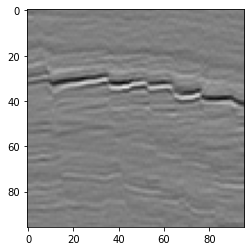

In [5]:
fault_images = os.listdir(image_directory + 'fault/')
for i, image_name in enumerate(fault_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'fault/' + image_name)
        plt.imshow(image, cmap='gray')  
        plt.show()
        break

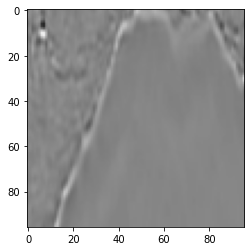

In [6]:
salt_images = os.listdir(image_directory + 'salt/')
for i, image_name in enumerate(salt_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'salt/' + image_name)
        plt.imshow(image, cmap='gray')  
        plt.show()
        break

In [7]:
# other_images = os.listdir(image_directory + 'other/')
# for i, image_name in enumerate(other_images):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(image_directory + 'other/' + image_name)
#         plt.imshow(image, cmap='gray')  
#         plt.show()
#         break

In [8]:
#creating labelled dataset, fault being labelled as 0 and salt as 1

In [9]:
fault_images = os.listdir(image_directory + 'fault/')
for i, image_name in enumerate(fault_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'fault/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [10]:
salt_images = os.listdir(image_directory + 'salt/')
for i, image_name in enumerate(salt_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'salt/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [11]:
# other_images = os.listdir(image_directory + 'other/')
# for i, image_name in enumerate(other_images):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(image_directory + 'other/' + image_name)
#         image = image.resize((SIZE, SIZE))
#         dataset.append(np.array(image))
#         label.append(2)

In [12]:
#Almost all images are of 96*96 size hence using SIZE = 96

In [13]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1) #Normalisation for bringing uniformity
drop1 = keras.layers.Dropout(rate=0.2)(norm1)             #Dropout to reduce risk of overfitting as dataset only contains 1000 images

conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   # categorical_crossentropy performs better to binary_crossentropy 
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248  

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [17]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 4,      
                         validation_split = 0.4,
                         shuffle = False
                      #   callbacks=callbacks
                     )

Epoch 1/4
8/8 [==============================] - 5s 540ms/step - loss: 0.5074 - accuracy: 0.8604 - val_loss: 64.3785 - val_accuracy: 0.4969
Epoch 2/4
8/8 [==============================] - 4s 539ms/step - loss: 0.0440 - accuracy: 0.9812 - val_loss: 11.3699 - val_accuracy: 0.5031
Epoch 3/4
8/8 [==============================] - 4s 542ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1244 - val_accuracy: 0.9688
Epoch 4/4
8/8 [==============================] - 4s 568ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3454 - val_accuracy: 0.7750


In [20]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

7/7 [==============================] - 0s 39ms/step - loss: 1.7316 - accuracy: 0.7300
Test_Accuracy: 73.00%


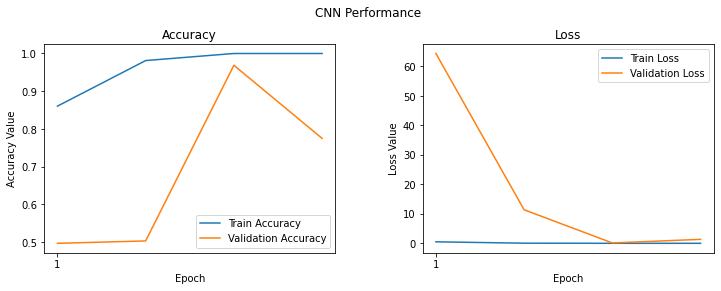

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [ ]:
##Due to limited data validation curve is showing zigzag behaviour, 
#if an enlarged dataset is present much higher consistent accuracy can be achievd with the same model.